# Coronavirus disease 2019 

COVID-19 - time series listing confirmed cases, reported deaths, and reported recoveries. 

Data is disaggregated by country (and sometimes subregion). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes time-series data tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection
the number of people who have reportedly died while sick with Coronavirus
the number of people who have reportedly recovered from it


Aim is to find the number of deaths  as a target variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# After importing the basic ML libraries, Let's import the dataset

df=pd.read_csv('aggregate_covid_country.csv')
df


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


In [4]:
# As Expected, Deaths are correlated strongly with Confirmed Cases.
# Let's have a look at count of unique Dates

df['Date'].nunique()


126

In [5]:
df.isnull().sum()
#There are no missing/null values

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [24]:
print(df.dtypes)
#Let's check the DataTypes
df.describe()

Date         int32
Country      int32
Confirmed    int64
Recovered    int64
Deaths       int64
Active       int64
dtype: object


,Date,Country,Confirmed,Recovered,Deaths,Active
count,23688.000000,23688.000000,2.368800e+04,23688.000000,23688.000000,2.368800e+04
mean,62.500000,93.500000,7.969368e+03,2581.801714,526.935030,4.860631e+03
std,36.372689,54.271303,5.842109e+04,15143.101257,3992.815956,4.340165e+04
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,31.000000,46.750000,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,62.500000,93.500000,1.800000e+01,1.000000,0.000000,1.200000e+01
75%,94.000000,140.250000,7.300000e+02,123.000000,13.000000,4.302500e+02
max,125.000000,187.000000,1.680913e+06,384902.000000,98913.000000,1.197098e+06


In [7]:
# Let's Have a look on India's Status
df_India = df[df['Country'] == 'India']

In [8]:
df_India.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


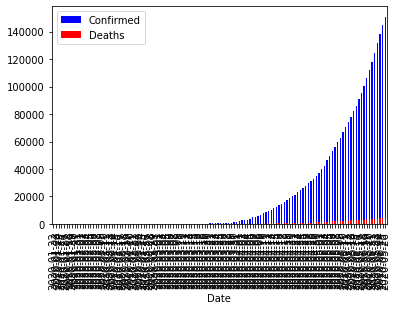

In [9]:
# Plot column 'Confirmed'
df_India.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'blue')
#Plotting for Deaths
ax1 = plt.gca()
df_India.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red',ax = ax1)
plt.show()

In [10]:
# Let's see the Active cases and create a new feature Active
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [11]:
# Veiwing Latest Stats based on COuntry
df_latest = df.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(df_latest)


                Country  Confirmed  Deaths  Recovered  Active
0           Afghanistan     185236    4669      20845  159722
1               Albania      41253    1629      25688   13936
2               Algeria     240070   23232     107345  109493
3               Andorra      41573    2219      20751   18603
4                Angola       1892     131        506    1255
..                  ...        ...     ...        ...     ...
183  West Bank and Gaza      19971     113       8798   11060
184      Western Sahara        307       1        186     120
185               Yemen       2696     460         92    2144
186              Zambia      15285     215       5281    9789
187            Zimbabwe       1760     199        373    1188

[188 rows x 5 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [12]:
# Veiwing Deaths based on Countries
result = df_latest[df_latest['Deaths']>0][['Country', 'Deaths']]
print(result)

                Country  Deaths
0           Afghanistan    4669
1               Albania    1629
2               Algeria   23232
3               Andorra    2219
4                Angola     131
..                  ...     ...
183  West Bank and Gaza     113
184      Western Sahara       1
185               Yemen     460
186              Zambia     215
187            Zimbabwe     199

[168 rows x 2 columns]


In [13]:
# countries with no cases of Novel Coronavirus
result2 = df_latest[df_latest['Confirmed']==0][['Country', 'Confirmed', 'Deaths', 'Recovered']]
print(result2)

Empty DataFrame
Columns: [Country, Confirmed, Deaths, Recovered]
Index: []


In [14]:
# countries with no cases of Death by Novel Coronavirus
result2 = df_latest[df_latest['Deaths']==0][['Country', 'Confirmed', 'Deaths', 'Recovered']]
print(result2)

                              Country  Confirmed  Deaths  Recovered
19                             Bhutan        608       0        209
30                           Cambodia       8024       0       5888
50                           Dominica        955       0        587
56                            Eritrea       2106       0       1066
60                               Fiji        979       0        476
69                            Grenada       1040       0        480
75                           Holy See        612       0         98
95                               Laos       1047       0        389
98                            Lesotho         19       0          0
116                          Mongolia       3197       0        679
120                           Namibia       1009       0        454
132                  Papua New Guinea        359       0        184
141                            Rwanda      12405       0       5971
142             Saint Kitts and Nevis        800

In [15]:
# countries with no cases of Recovered Novel Coronavirus
result3 = df_latest[df_latest['Recovered']==0][['Country', 'Confirmed', 'Deaths', 'Recovered']]
print(result3)

        Country  Confirmed  Deaths  Recovered
98      Lesotho         19       0          0
104  MS Zaandam        512     112          0


In [16]:
# countries with no active cases as per latest date
result4 = df_latest[df_latest['Active']==0][['Country', 'Confirmed', 'Deaths', 'Recovered','Active']]
print(result4)

Empty DataFrame
Columns: [Country, Confirmed, Deaths, Recovered, Active]
Index: []


In [17]:
# Top 10 Countries based on Confirmed Cases
result = df.groupby('Country').sum().sort_values(by='Confirmed', ascending=False)[:10].reset_index()
print(result)
result.head()

          Country  Confirmed  Recovered   Deaths    Active
0              US   57098767    8428678  3221969  45448120
1           Italy   11896347    4354815  1568276   5973256
2           Spain   11890691    5770271  1302010   4818410
3  United Kingdom    9150537      43829  1329006   7777702
4         Germany    9046257    6102898   319666   2623693
5           China    8871610    6776464   384657   1710489
6          France    8746538    2519190  1209634   5017714
7          Russia    7459042    1586423    70758   5801861
8          Brazil    6701409    2666743   438199   3596467
9          Turkey    5868751    2895790   152495   2820466


,Country,Confirmed,Recovered,Deaths,Active
0,US,57098767,8428678,3221969,45448120
1,Italy,11896347,4354815,1568276,5973256
2,Spain,11890691,5770271,1302010,4818410
3,United Kingdom,9150537,43829,1329006,7777702
4,Germany,9046257,6102898,319666,2623693


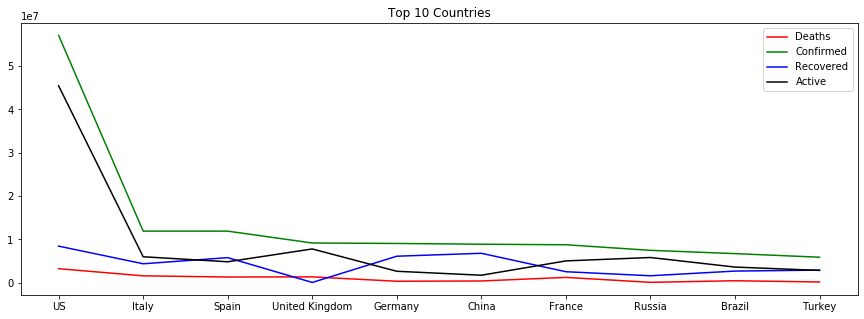

In [18]:
# Top 10 Countries Line Plot
plt.figure(figsize=(15, 5))
plt.plot(result['Country'], result['Deaths'],color='red',label='Deaths')
plt.plot(result['Country'], result['Confirmed'],color='green',label='Confirmed')
plt.plot(result['Country'], result['Recovered'], color='blue',label='Recovered')
plt.plot(result['Country'], result['Active'], color='black',label='Active')
plt.title('Top 10 Countries')
plt.legend()
plt.show()

In [19]:
df_date = df.groupby('Date').sum().reset_index()
df_date.head()

,Date,Confirmed,Recovered,Deaths,Active
0,2020-01-22,555,28,17,510
1,2020-01-23,654,30,18,606
2,2020-01-24,941,36,26,879
3,2020-01-25,1434,39,42,1353
4,2020-01-26,2118,52,56,2010


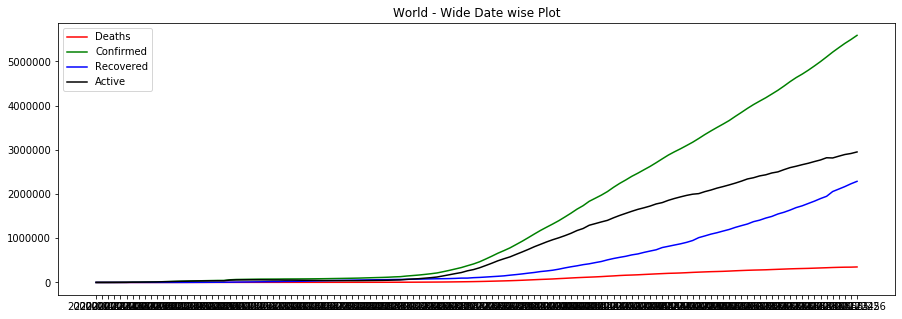

In [20]:
# Plotting All with respect to Date to see the trend

plt.figure(figsize=(15, 5))
plt.plot(df_date['Date'], df_date['Deaths'],color='red',label='Deaths')
plt.plot(df_date['Date'], df_date['Confirmed'],color='green',label='Confirmed')
plt.plot(df_date['Date'], df_date['Recovered'], color='blue',label='Recovered')
plt.plot(df_date['Date'], df_date['Active'], color='black',label='Active')
plt.title('World - Wide Date wise Plot')
plt.legend()
plt.show()

In [21]:
# Modelling

#Let's Label Encode Date and Country Features

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Date']=le.fit_transform(df['Date'])
df['Country']=le.fit_transform(df['Country'])

In [22]:
# Dividing into Features and Label

df_x=df.drop('Deaths',axis=1)
y=df[['Deaths']]

In [23]:
df_x.head()

,Date,Country,Confirmed,Recovered,Active
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [26]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [27]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [29]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  42  is  1.0


In [30]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

max r2 score corresponding to  85  is  0.9968264815313495


In [33]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 7}

In [34]:
knr=KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  42  is  0.9935674081308823


In [37]:
#Cross Validation of Various Models

print("\n \n Linear Regression \n\n")
model_evaluation(lr,x,y)


print("\n \n DECISION TREE REGRESSOR \n\n")
model_evaluation(dtr,x,y)


print("\n \n KNN REGRESSOR\n\n")
model_evaluation(knr,x,y)


 
 Linear Regression 


Mean r2 score for regressor:  1.0
standard deviation in r2 score for regressor:  0.0
[1. 1. 1. 1. 1.]

 
 DECISION TREE REGRESSOR 


Mean r2 score for regressor:  0.532236252097902
standard deviation in r2 score for regressor:  0.23184602921418548
[0.53681117 0.22384555 0.3415918  0.69273001 0.86620272]

 
 KNN REGRESSOR


Mean r2 score for regressor:  0.5650202933046309
standard deviation in r2 score for regressor:  0.46522391678880665
[ 0.7259351   0.83816324 -0.36131325  0.84582989  0.77648649]


# Going with Linear Regression

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [39]:
#Lets find the rmse and r2_score using sklearn.metrics for LR model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.3028958582162137e-11
r2_score is:  1.0


In [40]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,r2_score,mean_squared_error, mean_absolute_error


In [44]:
from sklearn.externals import joblib
joblib.dump(lr,'Covid.pkl')

['Covid.pkl']

In [45]:
#END